In [49]:
!pip install konlpy

    100% |████████████████████████████████| 19.4MB 1.5MB/s 
    100% |████████████████████████████████| 174kB 31.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [0]:
import pandas as pd

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/youtube/korea_vs_columbia.csv', header = 0)

In [41]:
df.head()

,Unnamed: 0,0,1
0,0,the korean GK is pretty good and in my opinio...,1일 전
1,1,Colombian players lost both the game and manne...,1일 전(수정됨)
2,2,Gooo from Vietnam,1일 전
3,3,Congrat South Korea you guys are one of the ...,1일 전
4,4,오늘 콜롬비아는 매너에서도 지고 경기도 지네 진짜 매번 할때마다 비신사적인 플레...,1일 전


In [0]:
df.drop(['Unnamed: 0', '1'], axis = 1, inplace = True)
df.columns = ['comment']

In [43]:
df.head()

,comment
0,the korean GK is pretty good and in my opinio...
1,Colombian players lost both the game and manne...
2,Gooo from Vietnam
3,Congrat South Korea you guys are one of the ...
4,오늘 콜롬비아는 매너에서도 지고 경기도 지네 진짜 매번 할때마다 비신사적인 플레...


In [0]:
import re 
#정규 표현식을 사용한 특수문자 제거 
hangul_list = []
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
for i in range(len(df['comment'])):
  result = hangul.sub('', df['comment'][i])
  hangul_list.append(result)
del hangul_list[0]

In [46]:
print(hangul_list)

['          ', '           ', '                   ', '오늘 콜롬비아는 매너에서도 지고 경기도 지네   진짜 매번 할때마다 비신사적인 플레이진짜 극혐이다 ', '                        ', '             ', '               ', '        ', '           ', '                                 ', '              ', '팔카오 좋아하는 선수였는데 통 던지는거보고 정뚝떨    ', '빛현우 진짜 오졌다   빛현우 없었음 ㅠㅠㅠㅠㅠㅠㅠ그리고 이재성 패스도 잘하고 왜이리 잘함   미쳐   현장감 넘치는 사운드로 더  재밌게 잘 봤습니다  ', '황의조의 전진패스는 첫 골의  를 기여한 것이다  역시 황의조는 콸리티가 높은 텃치  패스 능력이 있다  황의조 가 더 훨훨 날아올라라 ', '                                ', '와 진짜 확실히 조현우가 개 잘막는다 아무리 생각해도   ', '             ', '     ', '     ', '확실히 순발력있고 선방은 조현우인듯 우리보다 잘하는 강팀에는 조현우를 자주 애용할듯 ', '        ', '                ', '                      ', '                                           ', '왜인지 몰겠는데 현우가 선방할때마다 울컥거리고 눈물이나네 ', '후반 막바지에 갈 수록 조현우의 선방이 더욱 더 빛난 경기  대표팀 모두 고생하셨습니다  ', '                           ', '              ', '축구 하이라이트 보면서 우리나라 선방장면 찾아보는것은 조현우 경기가 유일  강팀과의 경기에서  골 무효로 만드는 능력 최고다 ', '벤투형   이런 조현우를 경기내내 안썼어  ', '        ', '          ', '진짜 오늘은

In [0]:
#한글 토큰화 
from konlpy.tag import Okt 

#명사 추출 
hangul_list_noun = [] 

In [0]:
okt = Okt() 
for i in range(len(hangul_list)):
  hangul_list_noun.append(okt.nouns(hangul_list[i]))

In [0]:
texts = [] 
for i in range(len(hangul_list_noun)):
  for j in range(len(hangul_list_noun[i])):
    texts.append(hangul_list_noun[i][j])

In [53]:
a = ' '.join(texts)
print(a)

오늘 콜롬비아 매너 지고 경기도 지네 진짜 매번 때 비신사적 플레이 진짜 극혐 팔카오 통 보고 정뚝 빛 현우 진짜 빛 현우 이재성 패스 왜 현장 감 사운드 더 황의조 전진 패스 첫 골 를 기여 것 역시 황의조 콸리티 텃치 패스 능력 황의조 더 훨훨 진짜 조현우 개 생각 순발력 선방 조현우 듯 우리 강팀 조현우 자주 애용 왜인 현우 선방 때 거리 눈물 이나 후반 막바지 수록 조현우 선방 더욱 더 경기 대표팀 모두 고생 축구 하이라이트 우리나라 선방 장면 조현우 경기 유일 강팀 경기 골 무효 능력 최고다 투 조현우 경기 내내 진짜 오늘 황의조 패스 조현우 선방 손흥민 만 골 이재성 이 넷 오늘 다음 의조 골 이쯤 손흥민 노란색 킬러 과학 임 조현우 진짜 핵 조현우 공격수 치면 이 경기 최소 골 경기 때 집중 일단 팔카오 로드리게스 슛 기 맥힌다 또 반응속도 진짜 말 후반 로드리게스 콜롬비아 조현우 조금 진짜 장시간 기색 최선 대한민국 축구팀 화이팅 국민 항상 응원 이재성 올해 첫 매치 골 침투 조현우 자리 빛 반응속도 뭐 내 생각 우리 수비 패스 미스 다소 생각 좀 모습 보이 안정 수비 기억 손흥민 경기 상대 노랑 유니폼 투호 축구 과거 모습 일단 축구 보기 관중 투호 기대 심리 옛날 축구 모습 조현우 진짜 케이리그 유럽 팀 어디 실력 아시아 치 선수 화이팅 하하 하하 흥민 이형 승 우형 부러 웟 나부 똒깥 세레머니 왜 이재성 선수 골 때 자막 손흥민 손흥민 손흥민 더 진짜 역시 빛 현우 다음 경기 이강인 선수 심판 콜롬비아 매너 개구 리더 조현우 골도 존나 말 안 각도 슛 조현우 포지션 반응 막 수가 슛 손흥민 무 회전 슛 따리 손 토트넘 다빈 손 산체스 좀 더 개 닼 한국 조현우 키퍼 등장 질 경기 저 안정환 강조 퍼스트 터치 구나 손흥민 밥 먹듯 콜롬비아 저 번 디아즈 카메라 손흥민 키스 진짜 조현우 솔직 동점 거나 질 상황 대박 우리 선수 고생 사랑 콜롬비아 경기도 지고 매너 나 저기 명 아리랑 외창 콜롬비아 애 개인 기량 직관 진짜 눈앞 골 빛 현우 선수

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 

stopwords = {'어디', '갸', '마', '아마', '줄', '때', '걸', '알', '전', '트', 
            '린', '쫌','저런', '뭔가', '내', '고', '좀', '처', '네', '닼', '임',
            '적인걸', '그', '분', '마', '그', '간다', '개', '노', '창', '갸',
            '요', '방귀', '뿡뿡이', '닼', '구나', '역시', '제대로', '완전', '정말', '말'}

In [0]:
wordcloud = WordCloud() 
wordcloud = wordcloud.generate_from_text(a)

In [0]:
wordcloud = WordCloud(stopwords = stopwords)
wordcloud = wordcloud.generate_from_text(a)

In [55]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [21]:
'''
import matplotlib.font_manager as fm
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도

path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
'''

"\nimport matplotlib.font_manager as fm\nimport matplotlib as mpl  # 기본 설정 만지는 용도\nimport matplotlib.pyplot as plt  # 그래프 그리는 용도\n\npath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'\nfont_name = fm.FontProperties(fname=path, size=10).get_name()\nprint(font_name)\nplt.rc('font', family=font_name)\n\nfm._rebuild()\nmpl.rcParams['axes.unicode_minus'] = False\n"

In [0]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/content/gdrive/My Drive/youtube/NanumGothicLight.ttf").get_name()
rc('font', family=font_name)

In [0]:
font_path = '/content/gdrive/My Drive/youtube/NanumGothicLight.ttf'

<class 'numpy.ndarray'>
(800, 800, 3)


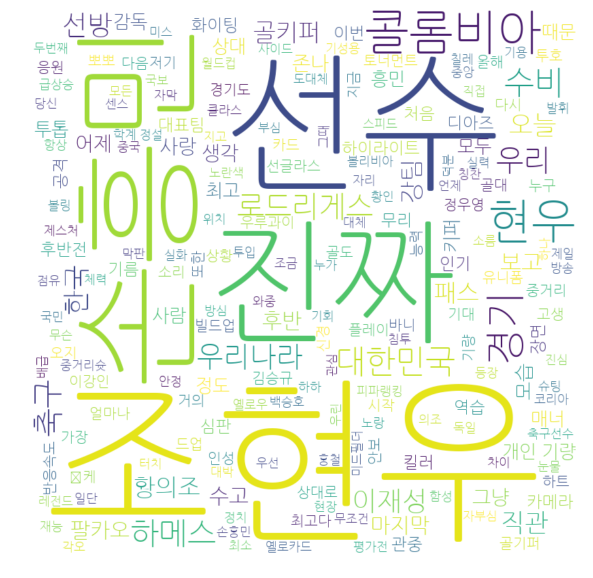

In [59]:
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800,
                     stopwords = stopwords,
                     background_color = 'white').generate_from_text(a)


array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('/content/gdrive/My Drive/youtube/korea_vs_columbia.png', )

In [0]:
#mask 이미지 사용하기 
import numpy as np
from PIL import Image 

goal_mask = np.array(Image.open('/content/gdrive/My Drive/youtube/골키퍼.png'))

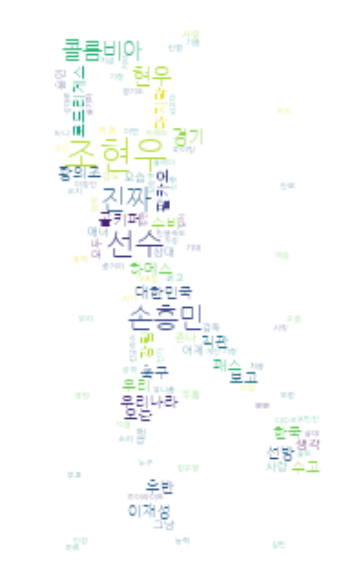

In [71]:
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800,
                     stopwords = stopwords,
                     background_color = 'white',
                     mask = goal_mask).generate_from_text(a)


%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('/content/gdrive/My Drive/youtube/wordcloud_goalkeeper_mask.png', )